# Pytest

The third-party testing framework *pytest* that is backwards compatible with `unittest` and `doctest` but that adds a simpler style of writing tests as well.  Beyond the base of what pytest provides, it has hundreds of plugins written for it which seamlessly enhance pytest for special use cases.

There are other testing frameworks that also try to build on `unittest`.  In the past there was a `unittest2` third-party tool.  Currently there is `nose2`, which replaced an older `nose`.  A number of others have been created, but only `nose2` and `pytest` are widely used and well maintained currently.  Pytest is somewhat more widely used and more fully featured.

The two broad differences you will notice between `unittest` and `pytest` tests are:

* Pytests are usually written as plain functions.  Even when a containing class is used, it is merely a container that does not inherit from anything.
* Assertions in pytest use the plain `assert` statement rather than various special `.assert*()` methods of the parent class.

As a result, tests are often simpler and easier to read, while being even more general through other mechanisms.

## Backward compatibility

We will continue to develop our `fractal` library.  Recall that it is organized in a manner like the below, which is typical of many projects.

```
Fractal
├── fractal
│   ├── ...
│   ├── mandelbrot.py
│   ├── sierpiński.py
│   └── visualize.py
└── test
    ├── ...
    ├── test_canvas.py
    └── test_points.py
```

As with the last lesson we want to make available the path to our project directory.

In [1]:
import os, sys
sys.path.append('Fractal')
from fractal.mandelbrot import mandelbrot
from fractal.sierpiński import gasket
from fractal.visualize import make_canvas, visualize

Our library allows us to generate and visualize fractals. For example:

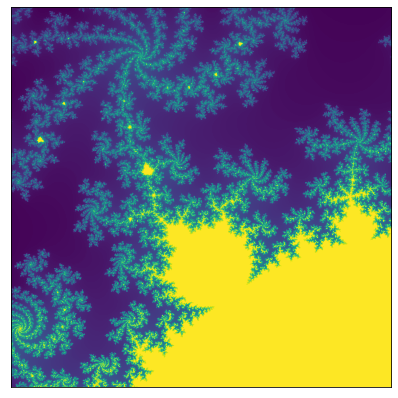

In [2]:
canvas = make_canvas(mandelbrot, 0.11, -0.63, 0.02, 800)
visualize(canvas)

In the directory for this lesson is a subdirectory `Fractal-03/` that contains the files from the last lesson.  We will make enhancements to the regular `Fractal/` project, but this lets us look at using pytest before making changes.

We *almost* have a drop-in replacement runner.

In [3]:
!cd Fractal-03; pytest

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal-03
plugins: xdist-2.1.0, forked-1.2.0
collected 9 items                                                              

test/test_canvas.py ....s..x                                             [ 88%]
test/test_points.py F                                                    [100%]

=================================== FAILURES ===================================
____________________________ TestRandom.test_random ____________________________

self = <test.test_points.TestRandom testMethod=test_random>

    def test_random(self):
        seed(2)
        for i in range(10):
>           self.assertTrue(random() < 0.9, msg="Value exceeds bounds")
E           AssertionError: False is not true : Value exceeds bounds

test/test_points.py:12: AssertionError
=========================== short te

The extra code we used to integrate doctests in `test_points.py` is not utilized by pytest.  The function `load_tests()` and the calls to e.g. `tests.addTests(doctest.DocTestSuite(mandelbrot))` are ignored.  

The omission is easy to fix with some command line switches that do not even need special functions.  The options switches used could also have been placed inside `pytest.ini` rather than use them on command line.

The output here is a bit too much to show in one slide, so we break it into several. 

In [4]:
!cd Fractal-03; pytest --doctest-modules --doctest-glob="*.md" > pytest.out
!head -12 Fractal-03/pytest.out

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal-03
plugins: xdist-2.1.0, forked-1.2.0
collected 14 items

Mandelbrot.md .                                                          [  7%]
fractal/koch.py .                                                        [ 14%]
fractal/mandelbrot.py .                                                  [ 21%]
fractal/sierpiński.py .F                                                 [ 35%]
test/test_canvas.py ....s..x                                             [ 92%]
test/test_points.py F                                                    [100%]


In [5]:
!sed -n '13,30p' Fractal-03/pytest.out


=================================== FAILURES ===================================
_____________________ [doctest] fractal.sierpiński.gasket ______________________
016     
017     >>> pixels, N = 500, 6
018     >>> canvas = gasket(pixels, N)
019     >>> canvas.shape
020     (500, 500)
021     
022     Each iteration adds 1/9th remaining points, but also increasing 
023     values for them at each iteration. Check weak lower bound.
024     
025     >>> canvas.sum() >= (pixels**2)/9 * N
Expected:
    True
Got:
    False



In [6]:
!sed -n '31,99p' Fractal-03/pytest.out

/home/dmertz/git/INE/unittest/04-PyTest/Fractal-03/fractal/sierpiński.py:25: DocTestFailure
____________________________ TestRandom.test_random ____________________________

self = <test.test_points.TestRandom testMethod=test_random>

    def test_random(self):
        seed(2)
        for i in range(10):
>           self.assertTrue(random() < 0.9, msg="Value exceeds bounds")
E           AssertionError: False is not true : Value exceeds bounds

test/test_points.py:12: AssertionError
=========================== short test summary info ============================
FAILED fractal/sierpiński.py::fractal.sierpiński.gasket
FAILED test/test_points.py::TestRandom::test_random - AssertionError: False i...
============== 2 failed, 10 passed, 1 skipped, 1 xfailed in 5.69s ==============


## Writing tests as functions

Continuing development of our fractal library, an implementation of of the Sierpiński gasket has been added.  Recall that in the prior version only a skeleton implementation was created, and hence one of the doctests for the module failed initially.  

As well, some minor enhancement of the `visualize()` function has been made.  These are features we can test.

Detail of the gasket suffer rounding issues as continuous regions fall between pixel boundaries.  It does well at about four iterations at default canvas size.

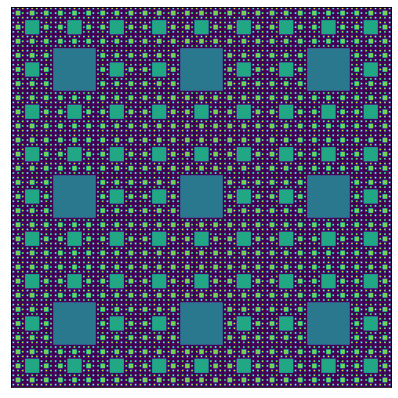

In [7]:
canvas = gasket(N=4)
visualize(canvas)

We can now use an alternate colormap and/or treat the zero-valued "background" as a higher value.  `visualize()` might mutate the canvas in the enhanced API.

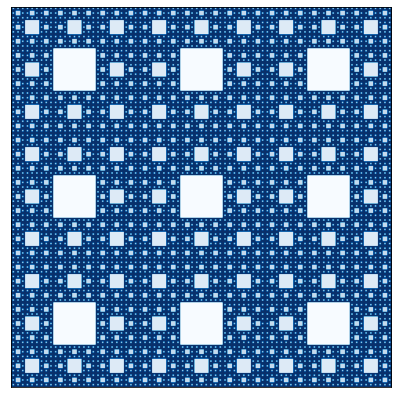

In [8]:
visualize(canvas, stretch_palette=True, cmap="Blues")

Our implementation passes the doctests in the module now.  We no longer fail on `canvas.sum() >= (pixels**2)/9 * N`.

In [9]:
!cd Fractal; pytest --doctest-modules fractal/sierpiński.py

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 2 items                                                              

fractal/sierpiński.py ..                                                 [100%]

============================== 2 passed in 0.81s ===============================


Let us write some tests using pytest functions.  Specifically, we would like to make sure the "stretching" behavior is as intended.

```python
import numpy as np
import pytest
from fractal.visualize import visualize
```
```python
def test_stretch_null():
    "If most values are used, canvas not modified"
    canvas = np.random.randint(256, size=(800, 800), 
                               dtype=np.uint8)
    original = canvas.copy()
    visualize(canvas, stretch_palette=True)
    assert (canvas == original).all()
    assert canvas.min() == 0
```

In other configurations, stretching should occur.  We can use various asserts in each function, any being violated will report details.

```python
def test_stretch_small():
    "If only a few values are used, convert zeros to 2*max"
    canvas = np.random.randint(33, size=(800, 800), 
                               dtype=np.uint8)
    original = canvas.copy()
    visualize(canvas, stretch_palette=True)
```
```python
    # should change some (many) pixels
    assert (canvas != original).any()
    assert canvas.min() > 0
    # the new max should be 64 (prior max was 32)
    assert canvas.max() == 64
    assert canvas[canvas < 64].max() == 32
```    

Depending on range of initial values on canvas, we stretch differently.

```python   
def test_stretch_medium():
    "If moderately >50% values used, convert zeros to 255"
    canvas = np.random.randint(151, size=(800, 800), 
                               dtype=np.uint8)
```
```python
    original = canvas.copy()
    visualize(canvas, stretch_palette=True)
    # should change some (many) pixels
    assert (canvas != original).any()
    assert canvas.min() > 0
    # the new max should be 255 (prior max was 150)
    assert canvas.max() == 255
    assert canvas[canvas < 255].max() == 150
```

As with `unittest`, sometimes it is sometimes better to express and expectation for a failure.

```python
@pytest.mark.xfail
def test_nostretch():
    "If stretch_palette=False, should not change values"
    canvas = np.random.randint(33, size=(800, 800), 
                               dtype=np.uint8)
    visualize(canvas, stretch_palette=False)
    # should NOT change any pixels
    assert canvas.min() > 0
```

In [10]:
!cd Fractal; pytest -v test/test_visualize.py

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1 -- /home/dmertz/miniconda3/envs/INE/bin/python
cachedir: .pytest_cache
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 4 items                                                              

test/test_visualize.py::test_stretch_null PASSED                         [ 25%]
test/test_visualize.py::test_stretch_small PASSED                        [ 50%]
test/test_visualize.py::test_stretch_medium PASSED                       [ 75%]
test/test_visualize.py::test_nostretch XFAIL                             [100%]

========================= 3 passed, 1 xfailed in 0.55s =========================


## Descriptive failures

In general, the failure reporting in `pytest` is more clear and more detailed than under `unittest`.  Let us run one particular test, first in default mode.  Notice the syntax of `::` to indicate one specific function within a test file.

In [11]:
!cd Fractal; pytest test/test_failure.py::test_np_failA

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 1 item                                                               

test/test_failure.py F                                                   [100%]

=================================== FAILURES ===================================
________________________________ test_np_failA _________________________________

    def test_np_failA():
        a = np.ones(5, dtype=int)
        b = np.array([1, 1, 3, 0, 1], dtype=int)
>       assert (a == b).all()
E       assert False
E        +  where False = <built-in method all of numpy.ndarray object at 0x7f6c4a532620>()
E        +    where <built-in method all of numpy.ndarray object at 0x7f6c4a532620> = array([1, 1, 1, 1, 1]) == array([1, 1, 3, 0, 1])
E             Use -v to get the full diff.all


In [12]:
!cd Fractal; pytest -v test/test_failure.py::test_np_failA > test_failure.out
!head -9 Fractal/test_failure.out

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1 -- /home/dmertz/miniconda3/envs/INE/bin/python
cachedir: .pytest_cache
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collecting ... collected 1 item

test/test_failure.py::test_np_failA FAILED                               [100%]



In [13]:
!tail -21 Fractal/test_failure.out

________________________________ test_np_failA _________________________________

    def test_np_failA():
        a = np.ones(5, dtype=int)
        b = np.array([1, 1, 3, 0, 1], dtype=int)
>       assert (a == b).all()
E       assert False
E        +  where False = <built-in method all of numpy.ndarray object at 0x7f17bd0b4ee0>()
E        +    where <built-in method all of numpy.ndarray object at 0x7f17bd0b4ee0> = array([1, 1, 1, 1, 1]) == array([1, 1, 3, 0, 1])
E             +array([1, 1, 1, 1, 1])
E             -array([1, 1, 3, 0, 1])
E             Full diff:
E             - array([1, 1, 3, 0, 1])
E             ?              ^  ^
E             + array([1, 1, 1, 1, 1])
E             ?              ^  ^.all

test/test_failure.py:6: AssertionError
=========================== short test summary info ============================
FAILED test/test_failure.py::test_np_failA - assert False
============================== 1 failed in 0.12s ===============================


Often particularly libraries, such as NumPy, will provide their own assertion functions which can be integrated with pytest.

These will often provide more specific and tailored details about failures.

In [14]:
!cd Fractal; pytest test/test_failure.py::test_np_failB | grep -v '^$'

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 1 item
test/test_failure.py F                                                   [100%]
=================================== FAILURES ===================================
________________________________ test_np_failB _________________________________
    def test_np_failB():
        a = np.ones(5, dtype=int)
        b = np.array([1, 1, 3, 0, 1], dtype=int)
>       np.testing.assert_array_equal(a, b)
E       AssertionError: 
E       Arrays are not equal
E       
E       Mismatched elements: 2 / 5 (40%)
E       Max absolute difference: 2
E       Max relative difference: 0.66666667
E        x: array([1, 1, 1, 1, 1])
E        y: array([1, 1, 3, 0, 1])
test/test_failure.py:12: AssertionError
=========================== short test summary info =

## Parameterized tests

At times we would like to perform a number of tests that are related in a systematic way, but that we still want to perform individually.  This is similar to the subtest capability in `unittest`.  

Recall first that the Sierpiński gasket consists of successively removing the middle square from a division of each remaining square into 9 even divisions.  The visualization makes this somewhat clear.  In other words, at each iteration, $\frac{8}{9}$ of the prior area remains.

However, it remains slightly tricky to calculate how many pixels we expect to remain zero-valued after N iterations because $\frac{8}{9}$ is not exactly representable as a floating point number.  The problem gets worse for each higher exponent we raise the fraction to.  Happily, Python's `Fraction` data type can fix this problem.

In [15]:
from fractions import Fraction
remaining = Fraction(8, 9)
remaining ** 5

Fraction(32768, 59049)

We would like to test that the right number of pixels were "removed" from the canvas for various pixel sizes and iteration counts.  Only powers of three canvas dimensions can ever do this without rounding errors; but even there, too many iterations exceed the available subdivisions.

```python
@pytest.mark.parametrize("pixels,N", [
        pytest.param(3**3, 2, id="9x9 canvas; 2 iterations"), 
        pytest.param(3**5, 2), pytest.param(3**5, 3),
        pytest.param(3**7, 2), pytest.param(3**7, 5)])
def test_outside_set(pixels, N):
    canvas = gasket(pixels, N)
    pix_count = pixels ** 2
    remaining_zeros = Fraction(8, 9)**N * pix_count
    assert len(canvas[canvas==0]) == remaining_zeros
```

In [16]:
!cd Fractal; pytest -v test/test_points.py::test_outside_set

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1 -- /home/dmertz/miniconda3/envs/INE/bin/python
cachedir: .pytest_cache
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 6 items                                                              

test/test_points.py::test_outside_set[9x9 canvas; 2 iterations] PASSED   [ 16%]
test/test_points.py::test_outside_set[243-2] PASSED                      [ 33%]
test/test_points.py::test_outside_set[243-3] PASSED                      [ 50%]
test/test_points.py::test_outside_set[2187-2] PASSED                     [ 66%]
test/test_points.py::test_outside_set[2187-3] PASSED                     [ 83%]
test/test_points.py::test_outside_set[2187-5] PASSED                     [100%]

============================== 6 passed in 19.79s ==============================


When even division is by three along axes fails, pixels get marked by inexact rounding.  Let us test some failures.

```python
@pytest.mark.parametrize("pixels,N", [
        pytest.param(3**3+1, 2), pytest.param(3**5+1, 2), 
        pytest.param(3**5-1, 3), pytest.param(3**7-1, 2), 
        pytest.param(3**7+1, 3), pytest.param(3**7-2, 5)])
@pytest.mark.xfail
def test_rounding_errors(pixels, N):
    canvas = gasket(pixels, N)
    pix_count = pixels ** 2
    remaining_zeros = Fraction(8, 9)**N * pix_count
    assert len(canvas[canvas==0]) == remaining_zeros
```

In [17]:
!cd Fractal; pytest -v test/test_points.py::test_rounding_errors

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1 -- /home/dmertz/miniconda3/envs/INE/bin/python
cachedir: .pytest_cache
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 6 items                                                              

test/test_points.py::test_rounding_errors[28-2] XFAIL                    [ 16%]
test/test_points.py::test_rounding_errors[244-2] XFAIL                   [ 33%]
test/test_points.py::test_rounding_errors[242-3] XFAIL                   [ 50%]
test/test_points.py::test_rounding_errors[2186-2] XFAIL                  [ 66%]
test/test_points.py::test_rounding_errors[2188-3] XFAIL                  [ 83%]
test/test_points.py::test_rounding_errors[2185-5] XFAIL                  [100%]

============================= 6 xfailed in 19.26s ==============================


Even with rounding problems, we expect the marking of the canvas to be *approximately* the theoretical ratio.  We might test for staying in the ballpark of the expected set density.

```python
@pytest.mark.parametrize("pixels,N", [
        pytest.param(3**3+1, 2), pytest.param(3**5+1, 2), 
        pytest.param(3**5-1, 3), pytest.param(3**7-1, 2), 
        pytest.param(3**7+1, 3), pytest.param(3**7-2, 5)])
def test_approx_outside_set(pixels, N):
    canvas = gasket(pixels, N)
    pix_count = pixels ** 2
    remaining_zeros = Fraction(8, 9)**N * pix_count
    assert 0.9 < len(canvas[canvas==0])/remaining_zeros < 1.1
```

In [18]:
!cd Fractal; pytest -v test/test_points.py::test_approx_outside_set

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1 -- /home/dmertz/miniconda3/envs/INE/bin/python
cachedir: .pytest_cache
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
collected 6 items                                                              

test/test_points.py::test_approx_outside_set[28-2] PASSED                [ 16%]
test/test_points.py::test_approx_outside_set[244-2] PASSED               [ 33%]
test/test_points.py::test_approx_outside_set[242-3] PASSED               [ 50%]
test/test_points.py::test_approx_outside_set[2186-2] PASSED              [ 66%]
test/test_points.py::test_approx_outside_set[2188-3] PASSED              [ 83%]
test/test_points.py::test_approx_outside_set[2185-5] PASSED              [100%]

============================== 6 passed in 19.82s ==============================


## Profiling tests

You have probably noticed that some of the tests performed are relatively slow.  Fractals can be hard to compute.  Pytest will let us examine the full collection of tests and easily identify the time consuming ones.  Perhaps we will want to run these on a different schedule, for example.

Once you accumulate many test, you may wish to start running them in parallel using plugins.  `pytest-xdist` and `pytest-parallel` can both achieve this.  Install those with `pip` or `conda` to make them available.  The `-n` or `--workers` can then be used to run multiple tests across different cores.

In [19]:
!cd Fractal; pytest -n 8 --durations=5 --doctest-modules --ignore=test/test_failure.py

============================= test session starts ==============================
platform linux -- Python 3.8.2, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/dmertz/git/INE/unittest/04-PyTest/Fractal
plugins: xdist-2.1.0, forked-1.2.0
gw0 [34] / gw1 [34] / gw2 [34] / gw3 [34] / gw4 [34] / gw5 [34] / gw6 [34] / gw7 [34]1m1m
...sxxx.............xx...x.....x.x                                       [100%]
============================= slowest 5 durations ==============================
18.09s call     test/test_points.py::test_approx_outside_set[2185-5]
17.17s call     test/test_points.py::test_outside_set[2187-5]
14.28s call     test/test_points.py::test_rounding_errors[2185-5]
13.21s call     test/test_points.py::test_outside_set[2187-3]
10.76s call     test/test_points.py::test_rounding_errors[2186-2]
================== 25 passed, 1 skipped, 8 xfailed in 29.39s ===================


## Summary

Most developers find the lighter weight function-based style of `pytest` easier to work with than the more object-oriented style of `unittest` (which descends from the *xUnit*, such as in Java JUnit or Smalltalk SUnit).  Given its backwards compatibility, it is often nicer to choose `pytest` no matter what particular unit test coding style you prefer.

One thing that should have stood out for you in this lesson is that I have not even shown you the implementations of functions like `gasket()` or `visualize()` that are subject to various tests.  This is very much by intention; in writing tests of expected behavior, seeing the implementation can often be a distraction leading you to false or overly specific assumptions.  Everything tested should be true of any possible implementations.

In the next lesson we will look at enhancing `pytest` tests using fixtures and mocks.  These can serve the same purpose accomplished by `unittest` setup and teardown scaffolding, but in a lighter weight and more flexible way.